In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

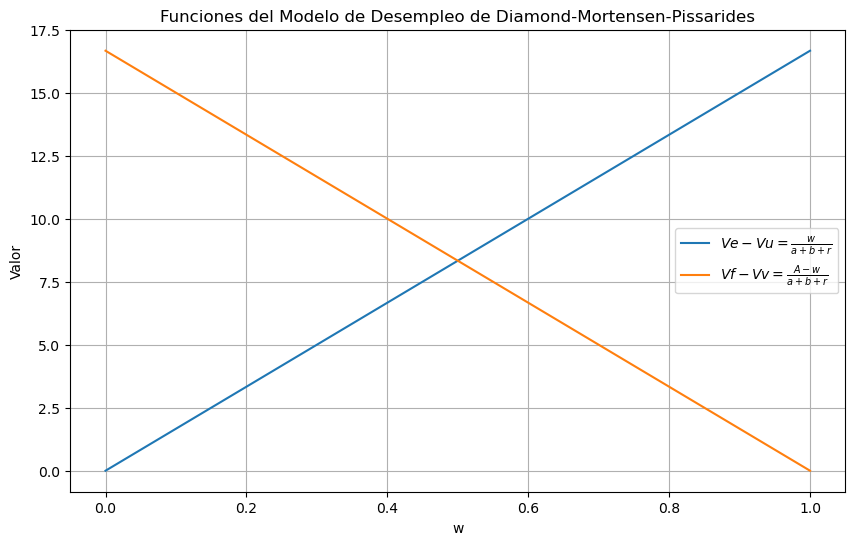

In [5]:
import matplotlib.pyplot as plt
# Asumir valores para las constantes
a = 0.02
b = 0.03
r = 0.01
A = 1.0

# Crear un rango de valores para w
w_values = np.linspace(0, 1, 100)

# Calcular las funciones
Ve_minus_Vu = w_values / (a + b + r)
Vf_minus_Vv = (A - w_values) / (a + b + r)

# Graficar las funciones
plt.figure(figsize=(10, 6))
plt.plot(w_values, Ve_minus_Vu, label=r'$Ve - Vu = \frac{w}{a + b + r}$')
plt.plot(w_values, Vf_minus_Vv, label=r'$Vf - Vv = \frac{A - w}{a + b + r}$')
plt.xlabel('w')
plt.ylabel('Valor')
plt.title('Funciones del Modelo de Desempleo de Diamond-Mortensen-Pissarides')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
# Parámetros proporcionados
beta = 0.5
gamma = 1 - beta
A = 1.5
K = 1
r = 0.04
b = 0.1
C = 1
L_bar = 100
s = 0.1  # Suponiendo una tasa de despido s

In [6]:
# Paso 1: Calcular el salario de equilibrio w
w = beta * (A + b) + (1 - beta) * C

# Función de coincidencia sujeta a la tecnología de coincidencia Cobb-Douglas: m(θ) = θ^α
alpha = 0.5  # Suposición para la función de coincidencia Cobb-Douglas

def equilibrium_conditions(x):
    theta, u = x
    q_theta = theta ** (-alpha)
    eq1 = theta - (A - w) / (K * (r + q_theta))
    eq2 = s * u - theta * q_theta * (1 - u)
    return [eq1, eq2]

# Valores iniciales para theta y u
initial_guess = [1, 0.1]

# Resolver el sistema de ecuaciones no lineales
theta_eq, u_eq = fsolve(equilibrium_conditions, initial_guess)

# Mostrar los valores de equilibrio
print(f"Salario de equilibrio (w): {w}")
print(f"Tasa de vacantes (theta_eq): {theta_eq}")
print(f"Tasa de desempleo (u_eq): {u_eq}")

Salario de equilibrio (w): 1.0150000000000001
Tasa de vacantes (theta_eq): 1.0
Tasa de desempleo (u_eq): 0.1


/var/folders/pv/088xlq6n437b0m1bfcy9zv840000gn/T/ipykernel_2444/2261830677.py:9: RuntimeWarning: invalid value encountered in scalar power
  q_theta = theta ** (-alpha)
/opt/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Original - Salario de equilibrio (w): 1.3, Tasa de vacantes (theta_eq): 0.03937251999268976, Tasa de desempleo (u_eq): 0.6649075420670438
Shock - Salario de equilibrio (w): 1.55, Tasa de vacantes (theta_eq): 0.1955223613802682, Tasa de desempleo (u_eq): 0.8984109657709776


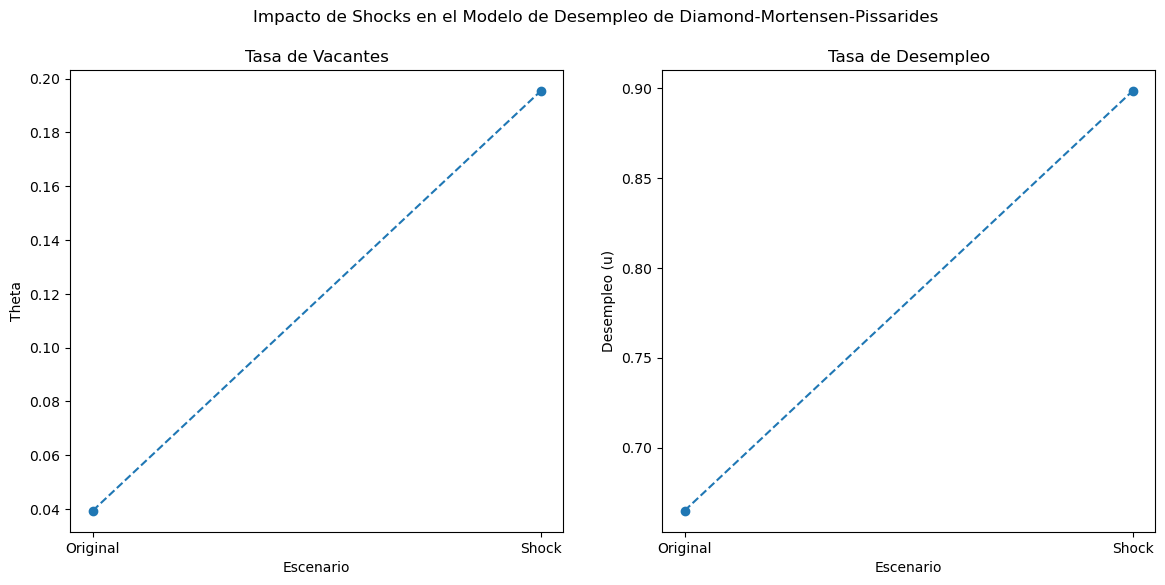

In [7]:

# Función para calcular el equilibrio
def calculate_equilibrium(A, s):
    # Parámetros constantes
    beta = 0.5
    gamma = 1 - beta
    K = 1
    r = 0.04
    b = 0.1
    C = 1

    # Calcular el salario de equilibrio w
    w = beta * (A + b) + (1 - beta) * C

    # Función de coincidencia sujeta a la tecnología de coincidencia Cobb-Douglas: m(θ) = θ^α
    alpha = 0.5  # Suposición para la función de coincidencia Cobb-Douglas

    def equilibrium_conditions(x):
        theta, u = x
        q_theta = theta ** (-alpha)
        eq1 = theta - (A - w) / (K * (r + q_theta))
        eq2 = s * u - theta * q_theta * (1 - u)
        return [eq1, eq2]

    # Valores iniciales para theta y u
    initial_guess = [1, 0.1]

    # Resolver el sistema de ecuaciones no lineales
    theta_eq, u_eq = fsolve(equilibrium_conditions, initial_guess)

    return w, theta_eq, u_eq

# Parámetros originales
A_original = 1.5
s_original = 0.1

# Parámetros después del shock
A_shock = 2.0
s_shock = 0.05  # Suponiendo una tasa de despido más baja después del shock

# Calcular los equilibrios
w_original, theta_original, u_original = calculate_equilibrium(A_original, s_original)
w_shock, theta_shock, u_shock = calculate_equilibrium(A_shock, s_shock)

# Imprimir los resultados
print(f"Original - Salario de equilibrio (w): {w_original}, Tasa de vacantes (theta_eq): {theta_original}, Tasa de desempleo (u_eq): {u_original}")
print(f"Shock - Salario de equilibrio (w): {w_shock}, Tasa de vacantes (theta_eq): {theta_shock}, Tasa de desempleo (u_eq): {u_shock}")

# Graficar los resultados
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de la tasa de vacantes
axs[0].plot(["Original", "Shock"], [theta_original, theta_shock], marker='o', linestyle='--')
axs[0].set_title('Tasa de Vacantes')
axs[0].set_xlabel('Escenario')
axs[0].set_ylabel('Theta')

# Gráfico de la tasa de desempleo
axs[1].plot(["Original", "Shock"], [u_original, u_shock], marker='o', linestyle='--')
axs[1].set_title('Tasa de Desempleo')
axs[1].set_xlabel('Escenario')
axs[1].set_ylabel('Desempleo (u)')

plt.suptitle('Impacto de Shocks en el Modelo de Desempleo de Diamond-Mortensen-Pissarides')
plt.show()